In [9]:
import pandas as pd
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import traceback

def extract_audio_features(file_path):
    """
    Extracts numerical features from a single audio file using librosa.
    Returns a 1D array of mean MFCCs.
    """
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        # Print the full traceback to help diagnose the specific audio file error
        print(f"Error encountered while parsing file: {file_path}")
        print("Detailed Error:")
        traceback.print_exc()
        return None
    return mfccs_processed

def load_audio_dataset(dataset_path):
    """Loads audio files, extracts features, and creates a Pandas DataFrame."""
    features = []
    labels = []
    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        if not os.path.isdir(class_path):
            continue
        print(f"Processing class: {class_label}")
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                data = extract_audio_features(file_path)
                if data is not None:
                    features.append(data)
                    labels.append(class_label)
    
    # Check if any features were successfully extracted
    if not features:
        print("\nError: No features were extracted. Please check your audio files.")
        return None
    
    dataset = pd.DataFrame(features)
    dataset['class'] = labels
    return dataset

def prepare_features_and_target(dataframe, target_column):
    """Separates features and target, and scales the features."""
    features = dataframe.drop(columns=[target_column])
    target = dataframe[target_column]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features, target

def split_data(features, target, test_ratio=0.2, seed=42):
    """Splits data into training and testing sets."""
    return train_test_split(features, target, test_size=test_ratio, random_state=seed)

def build_knn_model(k_value):
    """Initializes a KNeighborsClassifier model."""
    return KNeighborsClassifier(n_neighbors=k_value)

def get_predictions(model, train_features, test_features):
    """Generates predictions for both training and test data."""
    return model.predict(train_features), model.predict(test_features)

def evaluate(y_true, y_pred):
    """Calculates evaluation metrics."""
    return confusion_matrix(y_true, y_pred), classification_report(y_true, y_pred, digits=4), accuracy_score(y_true, y_pred)

def assess_fit(train_acc, test_acc):
    """Determines if the model is underfit, regular fit, or overfit based on accuracy."""
    if abs(train_acc - test_acc) < 0.05:
        return "Regular Fit"
    elif train_acc > test_acc:
        return "Overfit"
    else:
        return "Underfit"

# --- Main Program (A1) ---
# NOTE: This path should point to the main directory containing your class subfolders.
dataset_path = "/Users/dhrithijuvva/Desktop/Women ML/Audio Signal Dataset for Danger Detection of Women and Children"

df_audio_features = load_audio_dataset(dataset_path)

if df_audio_features is not None:
    target_column = 'class'
    
    X_scaled, y = prepare_features_and_target(df_audio_features, target_column=target_column)
    
    X_train, X_test, y_train, y_test = split_data(X_scaled, y)
    
    k = 3
    knn_model = build_knn_model(k)
    knn_model.fit(X_train, y_train)
    
    y_train_pred, y_test_pred = get_predictions(knn_model, X_train, X_test)
    
    train_conf_matrix, train_report, train_accuracy = evaluate(y_train, y_train_pred)
    test_conf_matrix, test_report, test_accuracy = evaluate(y_test, y_test_pred)
    
    print("\n--- Model Evaluation Results ---")
    print("Train Confusion Matrix:\n", train_conf_matrix)
    print("Train Classification Report:\n", train_report)
    print("Test Confusion Matrix:\n", test_conf_matrix)
    print("Test Classification Report:\n", test_report)
    print("Train Accuracy:", round(train_accuracy, 4))
    print("Test Accuracy:", round(test_accuracy, 4))
    print("Model status:", assess_fit(train_accuracy, test_accuracy))
else:
    print("\nCould not proceed with model training due to audio file processing errors.")

Processing class: test
Processing class: train

Error: No features were extracted. Please check your audio files.

Could not proceed with model training due to audio file processing errors.


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def calculate_mape(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def analyze_regression_results(y_true, y_pred):
    """Calculates and prints various regression metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = calculate_mape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"R-squared (R2) Score: {r2:.4f}")

# --- Main Program (A2) ---
# TODO: Replace this with your actual target values and model predictions.
y_true = np.array([100, 150, 200, 250, 300])  # Actual values
y_pred = np.array([105, 145, 190, 260, 295])  # Predicted values

analyze_regression_results(y_true, y_pred)

Mean Squared Error (MSE): 55.0000
Root Mean Squared Error (RMSE): 7.4162
Mean Absolute Percentage Error (MAPE): 3.8000%
R-squared (R2) Score: 0.9890


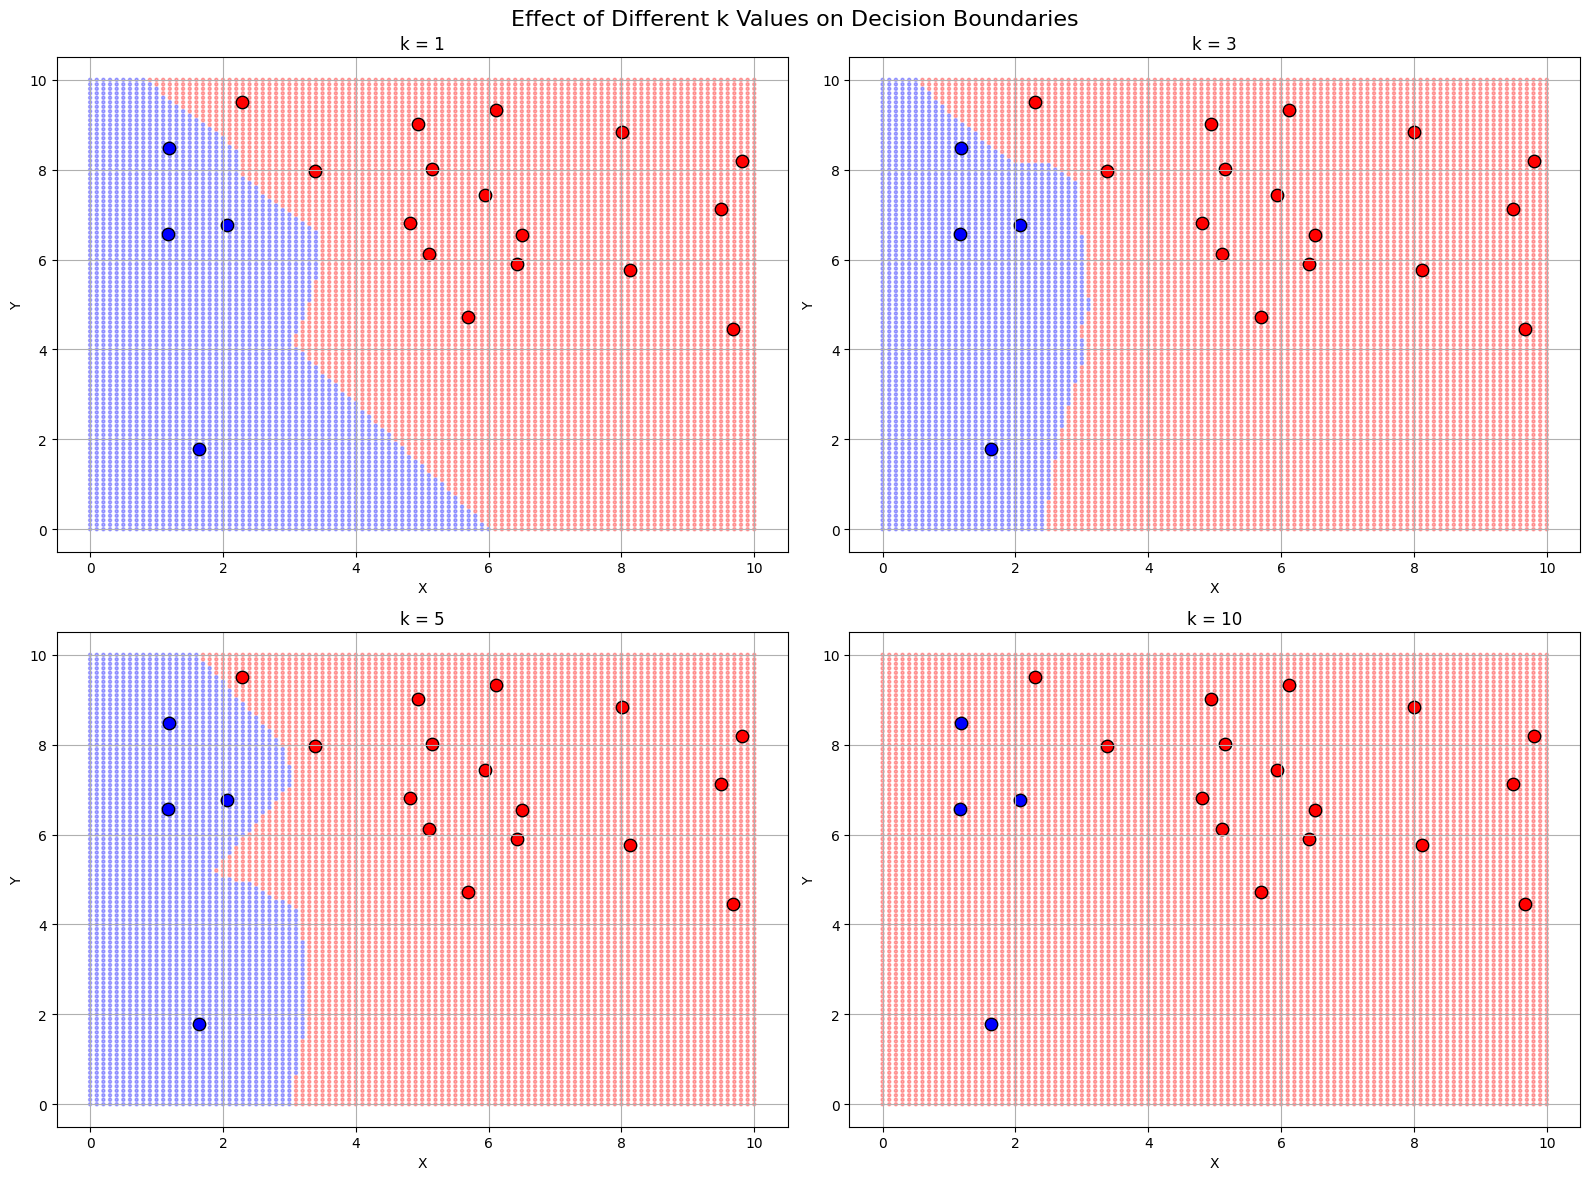

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_training_data(n_samples=20, low=1, high=10, seed=0):
    """Generates a small training dataset with two features and class labels."""
    np.random.seed(seed)
    X = np.random.uniform(low, high, (n_samples, 2))
    y = np.array([1 if x[0] + x[1] > 10 else 0 for x in X])
    return X, y

def generate_test_grid(step=0.1, min_val=0, max_val=10):
    """Creates a grid of test data points."""
    x_vals = np.arange(min_val, max_val + step, step)
    y_vals = np.arange(min_val, max_val + step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    return grid_points, xx, yy

def train_and_predict_knn(X_train, y_train, X_test, k):
    """Trains a KNN model and makes predictions."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def plot_knn_results(X_train, y_train, X_test, y_preds, k_values):
    """Plots decision boundaries for various k values."""
    plt.figure(figsize=(16, 12))
    for i, k in enumerate(k_values):
        y_pred = y_preds[i]
        plt.subplot(2, 2, i + 1)
        plt.title(f"k = {k}")
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c=['red' if label == 1 else 'blue' for label in y_pred],
                    alpha=0.3, s=5)
        for j in range(len(X_train)):
            color = 'red' if y_train[j] == 1 else 'blue'
            plt.scatter(X_train[j, 0], X_train[j, 1], color=color,
                        edgecolor='black', s=80)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
    plt.suptitle("Effect of Different k Values on Decision Boundaries", fontsize=16)
    plt.tight_layout()
    plt.show()

# --- Main Program (A3-A5) ---
X_train, y_train = generate_training_data()
X_test, _, _ = generate_test_grid()
k_values = [1, 3, 5, 10]
y_predictions = [train_and_predict_knn(X_train, y_train, X_test, k) for k in k_values]
plot_knn_results(X_train, y_train, X_test, y_predictions, k_values)

In [12]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def extract_audio_features(file_path):
    """Extracts numerical features (MFCCs) from a single audio file."""
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        return None
    return mfccs_processed

def load_audio_dataset(dataset_path):
    """Loads audio files, extracts features, and creates a Pandas DataFrame."""
    features = []
    labels = []
    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        if not os.path.isdir(class_path):
            continue
        print(f"Processing class: {class_label}")
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                data = extract_audio_features(file_path)
                if data is not None:
                    features.append(data)
                    labels.append(class_label)
    if not features:
        print("\nError: No features were extracted. Please check your audio files.")
        return None
    dataset = pd.DataFrame(features)
    dataset['class'] = labels
    return dataset

def create_test_grid(df, feature1, feature2, step=1):
    """Creates a grid of test data points based on feature ranges."""
    x_vals = np.arange(df[feature1].min(), df[feature1].max(), step)
    y_vals = np.arange(df[feature2].min(), df[feature2].max(), step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    X_test = np.c_[xx.ravel(), yy.ravel()]
    return X_test

def train_knn_and_predict(X_train, y_train, X_test, k):
    """Trains a KNN model and makes predictions."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def plot_decision_boundary_comparison(X_train, y_train, X_test, k_values, feature_names):
    """Compares decision boundaries for a list of k values."""
    plt.figure(figsize=(12, 10))
    for i, k in enumerate(k_values):
        y_pred = train_knn_and_predict(X_train, y_train, X_test, k)
        plt.subplot(2, 2, i + 1)
        plt.title(f"k = {k}")
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c=y_pred, alpha=0.3, cmap='viridis', s=5)
        plt.scatter(X_train[:, 0], X_train[:, 1],
                    c=y_train, edgecolor="black", cmap='viridis', s=80)
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
        plt.grid(True)
    plt.suptitle("KNN Classification with Various k on Project Data", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# --- Main Program (A6) ---
dataset_path = "/Users/dhrithijuvva/Desktop/Women ML/Audio Signal Dataset for Danger Detection of Women and Children"
df_audio_features = load_audio_dataset(dataset_path)

if df_audio_features is not None:
    features_for_plot = [0, 1]  
    X_train_plot = df_audio_features.iloc[:, features_for_plot].values
    y_train_plot = pd.Categorical(df_audio_features['class']).codes
    X_test_grid = create_test_grid(df_audio_features, features_for_plot[0], features_for_plot[1])
    k_values = [1, 3, 5, 10]
    plot_decision_boundary_comparison(X_train_plot, y_train_plot, X_test_grid, k_values, ['MFCC_0', 'MFCC_1'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dhrithijuvva/Desktop/Women ML/Audio Signal Dataset for Danger Detection of Women and Children'

In [13]:
import pandas as pd
import numpy as np
import os
import librosa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

def extract_audio_features(file_path):
    """Extracts numerical features (MFCCs) from a single audio file."""
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        return None
    return mfccs_processed

def load_audio_dataset(dataset_path):
    """Loads audio files, extracts features, and creates a Pandas DataFrame."""
    features = []
    labels = []
    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        if not os.path.isdir(class_path):
            continue
        print(f"Processing class: {class_label}")
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                data = extract_audio_features(file_path)
                if data is not None:
                    features.append(data)
                    labels.append(class_label)
    if not features:
        print("\nError: No features were extracted. Please check your audio files.")
        return None
    dataset = pd.DataFrame(features)
    dataset['class'] = labels
    return dataset

def prepare_features_and_target(dataframe, target_column):
    """Separates features and target, and scales the features."""
    features = dataframe.drop(columns=[target_column])
    target = dataframe[target_column]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features, target

def split_data(features, target, test_ratio=0.2, seed=42):
    """Splits data into training and testing sets."""
    return train_test_split(features, target, test_size=test_ratio, random_state=seed)

def perform_grid_search(X_train, y_train, k_range):
    """Performs a grid search to find the best k for the KNN classifier."""
    param_grid = {'n_neighbors': list(k_range)}
    model = KNeighborsClassifier()
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_params_['n_neighbors']

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and returns a classification report."""
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report

# --- Main Program (A7) ---
dataset_path = "/Users/dhrithijuvva/Desktop/Women ML/Audio Signal Dataset for Danger Detection of Women and Children"
df_audio_features = load_audio_dataset(dataset_path)

if df_audio_features is not None:
    target_column = 'class'
    X, y = prepare_features_and_target(df_audio_features, target_column=target_column)
    X_train, X_test, y_train, y_test = split_data(X, y)
    best_model, best_k = perform_grid_search(X_train, y_train, range(1, 21))
    report = evaluate_model(best_model, X_test, y_test)
    print("Best k found:", best_k)
    print("\nClassification Report:\n", report)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dhrithijuvva/Desktop/Women ML/Audio Signal Dataset for Danger Detection of Women and Children'